<a href="https://colab.research.google.com/github/cuzmyk/data_mining/blob/main/pr7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Практическая работа №7. Применение методов машинного обучения для решения задач классификации текстов. Метод Наивного Байеса. Метод опорных векторов**

## Задание 0. Найдите в глобальной сети или соберите свой датасет для классификации текстов (Пример: новости -> рубрики, комментарии в соц. сетях -> характер, )

* Количество классов в датасете должно превышать 2
* Язык текста в датасете: русский

- ### Пример датасетов: [Russian Texts](https://www.kaggle.com/datasets?search=text+classification+russian)

### Загрузите датасет

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
df = pd.read_csv('train.csv', sep=',')
df.head()

,oid,category,text
0,365271984,winter_sport,Волшебные фото Виктория Поплавская ЕвгенияМедв...
1,503385563,extreme,Возвращение в подземелье Треша 33 Эйфория тупо...
2,146016084,football,Лучшие чешские вратари – Доминик Доминатор Гаш...
3,933865449,boardgames,Rtokenoid Warhammer40k валрак решил нас подкор...
4,713550145,hockey,Шестеркин затаскивает Рейнджерс в финал Восточ...


### Разделите данные на обучающую и валидационную выборки

In [ ]:
X = df['text']
y = df['category']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

### При выполении дальнейших заданий поэксперементируйте с методами векторизации текста:


1. [Bag of Words](https://habr.com/ru/companies/mlclass/articles/270591/) (BOW): Bag of Words представляет текст как вектор, где каждый элемент обозначает количество вхождений конкретного слова в тексте. Процесс включает в себя создание словаря всех уникальных слов в корпусе текстов и подсчет частоты встречаемости каждого слова в отдельных текстах.

2. [TF-IDF](https://habr.com/ru/companies/otus/articles/755772/) (Term Frequency-Inverse Document Frequency): TF-IDF учитывает не только количество вхождений слова в текст, но и частоту его встречаемости в других текстах. Он вычисляет вес слова, умножая его частоту встречаемости (term frequency) на обратную частоту документа (inverse document frequency). Это позволяет снизить вес наиболее часто встречающихся слов, которые могут быть менее информативными.

3. Word Embeddings (например, [Word2Vec](https://habr.com/ru/articles/446530/) и [GloVe](https://jonathan-hui.medium.com/nlp-word-embedding-glove-5e7f523999f6)): Word Embeddings используют нейронные сети для создания векторных представлений слов, которые учитывают семантическую близость между словами. Нейронные сети обучаются на больших текстовых корпусах и захватывают семантические отношения между словами, что позволяет представить слова в векторном пространстве.

4. One-Hot Encoding: One-Hot Encoding преобразует каждое слово в уникальный вектор, где все элементы равны нулю, за исключением одного, который равен единице. Каждый вектор соответствует отдельному слову и используется для представления его в пространстве признаков.

5. [Count Vectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html): Count Vectorizer подсчитывает количество раз, которое каждое слово встречается в тексте. Он создает вектор, в котором каждый элемент соответствует количеству вхождений конкретного слова в текст.

6. [Hashing Vectorizer](https://kavita-ganesan.com/hashingvectorizer-vs-countvectorizer/): Hashing Vectorizer преобразует каждое слово в уникальный числовой идентификатор с помощью хеширования. Он использует хеш-функцию для преобразования слова в числовое значение, которое затем используется в векторном представлении.

7. [Doc2Vec](https://habr.com/ru/articles/599513/): Doc2Vec является расширением метода Word2Vec и позволяет получить векторное представление не только отдельных слов, но и целых документов или текстов. Алгоритм обучает нейронную сеть, которая учитывает контекст и порядок слов в предложении, чтобы получить векторное представление документа. Это позволяет сравнивать и измерять семантическую близость между целыми текстовыми документами.

In [ ]:
pipeline_tfidf = Pipeline([
    ('vectorizer', TfidfVectorizer()),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

pipeline_tfidf.fit(X_train, y_train)

y_pred_tfidf = pipeline_tfidf.predict(X_val)

accuracy_tfidf = accuracy_score(y_val, y_pred_tfidf)
print(f'Accuracy (TF-IDF): {accuracy_tfidf:.4f}')

Accuracy (TF-IDF): 0.7930


In [ ]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

tagged_docs = [TaggedDocument(words=text.split(), tags=[i]) for i, text in enumerate(X_train)]

doc2vec_model = Doc2Vec(tagged_docs, vector_size=100, window=5, min_count=1, workers=4)

X_train_doc2vec = np.array([doc2vec_model.infer_vector(doc.words) for doc in tagged_docs])
X_val_doc2vec = np.array([doc2vec_model.infer_vector(text.split()) for text in X_val])

classifier_doc2vec = RandomForestClassifier(n_estimators=100, random_state=42)
classifier_doc2vec.fit(X_train_doc2vec, y_train)

y_pred_doc2vec = classifier_doc2vec.predict(X_val_doc2vec)

accuracy_doc2vec = accuracy_score(y_val, y_pred_doc2vec)
print(f'Accuracy (Doc2Vec): {accuracy_doc2vec:.4f}')

Accuracy (Doc2Vec): 0.4320


#### Оцените влияние разных методов на конечный результат

## Задание 1. Обучите модель классификатора Naive Bayes для решения поставленной задачи, используя пайплайн и подбор оптимальных параметров

In [ ]:
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', MultinomialNB())
])

parameters = {
    'tfidf__max_df': (0.5, 0.75, 1.0),
    'tfidf__ngram_range': ((1, 1), (1, 2)),
    'clf__alpha': (0.1, 0.5, 1.0),
}

grid_search = GridSearchCV(pipeline, parameters, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('clf', MultinomialNB())]),
             n_jobs=-1,
             param_grid={'clf__alpha': (0.1, 0.5, 1.0),
                         'tfidf__max_df': (0.5, 0.75, 1.0),
                         'tfidf__ngram_range': ((1, 1), (1, 2))},
             verbose=1)

### Вывод матрицы ошибок:

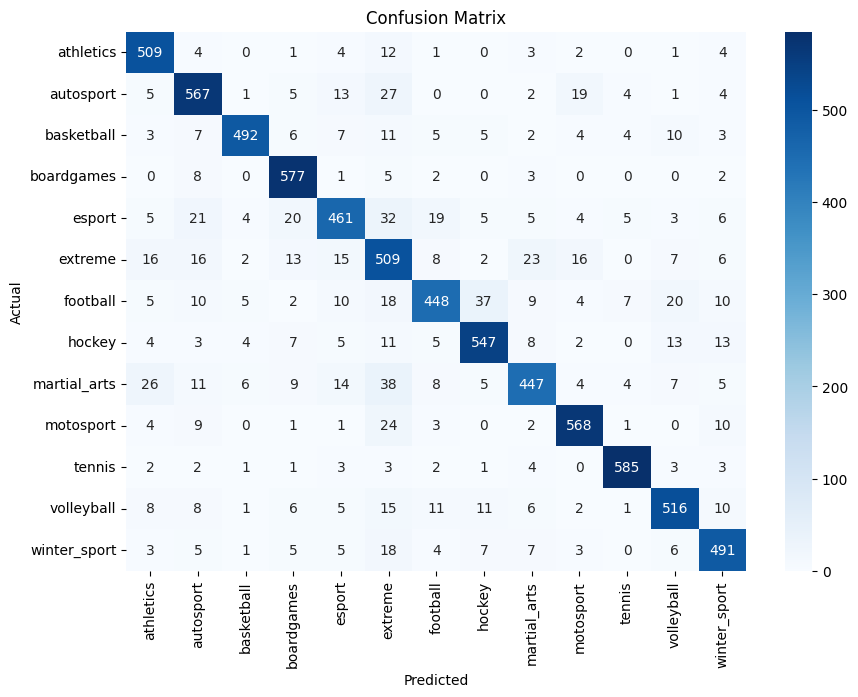

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = grid_search.predict(X_val)

conf_matrix = confusion_matrix(y_val, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=grid_search.classes_, yticklabels=grid_search.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Оценка точности:

In [ ]:
NBacc = accuracy_score(y_val, y_pred)
print("Accuracy:", NBacc)

Accuracy: 0.8669334021683015


## Задание 2. Обучите модель SVM (метод опорных векторов) для решения поставленной задачи, используя пайплайны и подбор оптимальных параметров

In [ ]:
from sklearn.svm import SVC

pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('svc', SVC())
])

parameters = {
    'tfidf__max_df': (0.9, 1.0),
    'tfidf__ngram_range': ((1, 1),),
    'svc__C': (1, 5),
    'svc__kernel': ('linear',),
    'svc__gamma': ('scale',)
}

grid_search = GridSearchCV(pipeline, parameters, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('svc', SVC())]),
             n_jobs=-1,
             param_grid={'svc__C': (1, 5), 'svc__gamma': ('scale',),
                         'svc__kernel': ('linear',),
                         'tfidf__max_df': (0.9, 1.0),
                         'tfidf__ngram_range': ((1, 1),)},
             verbose=1)

### Вывод матрицы ошибок:

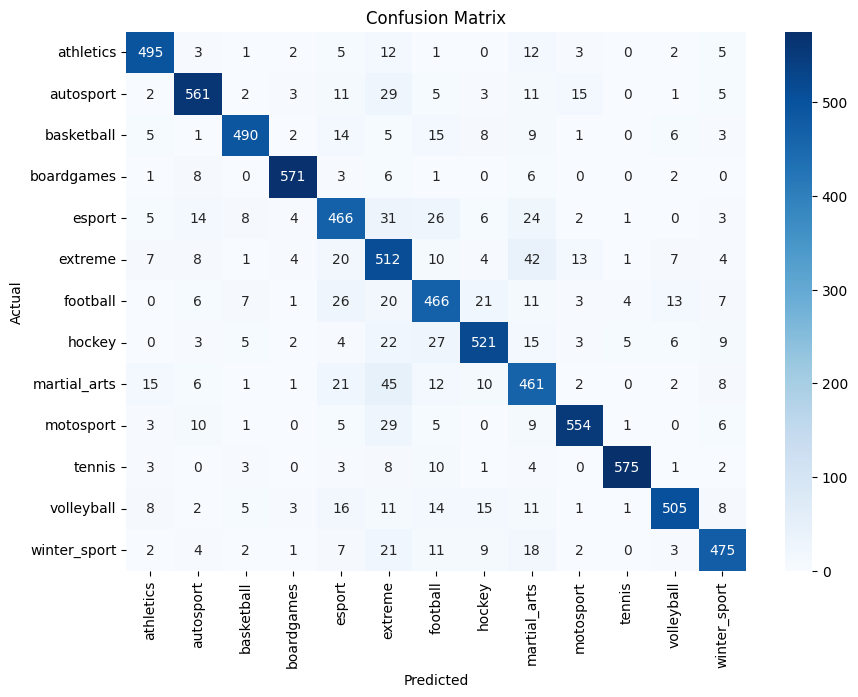

In [ ]:
y_pred = grid_search.predict(X_val)

conf_matrix = confusion_matrix(y_val, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=grid_search.classes_, yticklabels=grid_search.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Оценка точности:

In [ ]:
SVMacc = accuracy_score(y_val, y_pred)
print("Accuracy:", SVMacc)

Accuracy: 0.858544140423335


## Задание 3. Обучите модель классификатора Decision Tree Classifier для решения поставленной задачи

In [ ]:
from sklearn.tree import DecisionTreeClassifier

pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('dtc', DecisionTreeClassifier())
])

parameters = {
    'tfidf__max_df': (0.75, 1.0),
    'tfidf__ngram_range': ((1, 1),),
    'dtc__criterion': ('gini',),
    'dtc__max_depth': (None, 20),
    'dtc__min_samples_split': (2,)
}

grid_search = GridSearchCV(pipeline, parameters, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('dtc', DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid={'dtc__criterion': ('gini',),
                         'dtc__max_depth': (None, 20),
                         'dtc__min_samples_split': (2,),
                         'tfidf__max_df': (0.75, 1.0),
                         'tfidf__ngram_range': ((1, 1),)},
             verbose=1)

### Вывод матрицы ошибок:

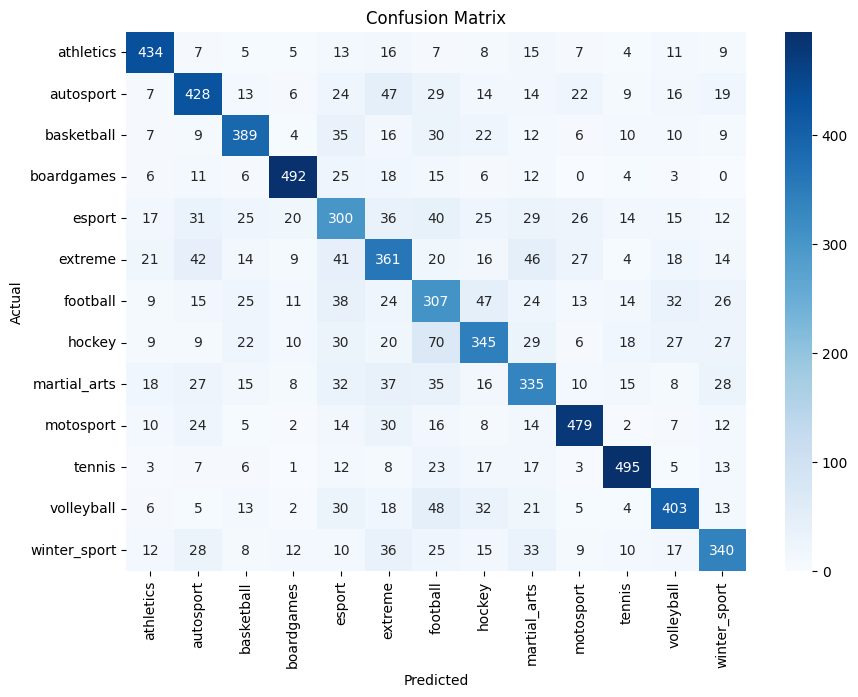

In [ ]:
y_pred = grid_search.predict(X_val)

conf_matrix = confusion_matrix(y_val, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=grid_search.classes_, yticklabels=grid_search.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Оценка точности:

In [ ]:
DTCacc = accuracy_score(y_val, y_pred)
print("Accuracy:", DTCacc)

Accuracy: 0.6592669075890553


## Задание 4. Обучите модель классификатора Random Forest Classifier для решения поставленной задачи

In [ ]:
from sklearn.ensemble import RandomForestClassifier

pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('rfc', RandomForestClassifier())
])

parameters = {
    'tfidf__max_df': (0.75,),
    'tfidf__ngram_range': ((1, 1),),
    'rfc__n_estimators': [100],
    'rfc__criterion': ('gini',),
    'rfc__max_depth': (None,),
    'rfc__min_samples_split': (2,)
}

grid_search = GridSearchCV(pipeline, parameters, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('rfc', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'rfc__criterion': ('gini',), 'rfc__max_depth': (None,),
                         'rfc__min_samples_split': (2,),
                         'rfc__n_estimators': [100], 'tfidf__max_df': (0.75,),
                         'tfidf__ngram_range': ((1, 1),)},
             verbose=1)

### Вывод матрицы ошибок:

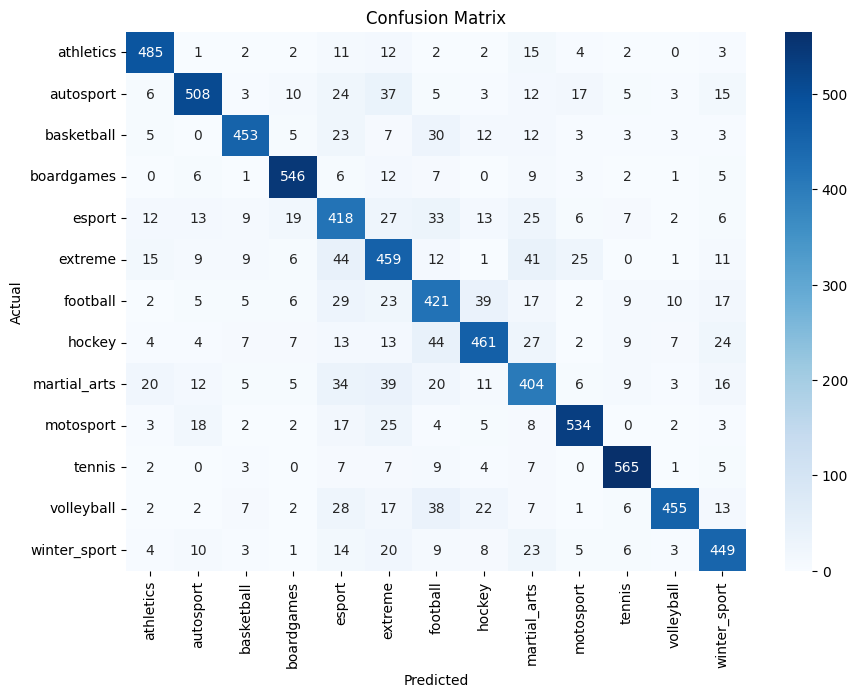

In [ ]:
y_pred = grid_search.predict(X_val)

conf_matrix = confusion_matrix(y_val, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=grid_search.classes_, yticklabels=grid_search.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Оценка точности:

In [ ]:
RFacc = accuracy_score(y_val, y_pred)
print("Accuracy:", RFacc)

Accuracy: 0.7947857511615901


## Подведите общие итоги и сделайте выводы

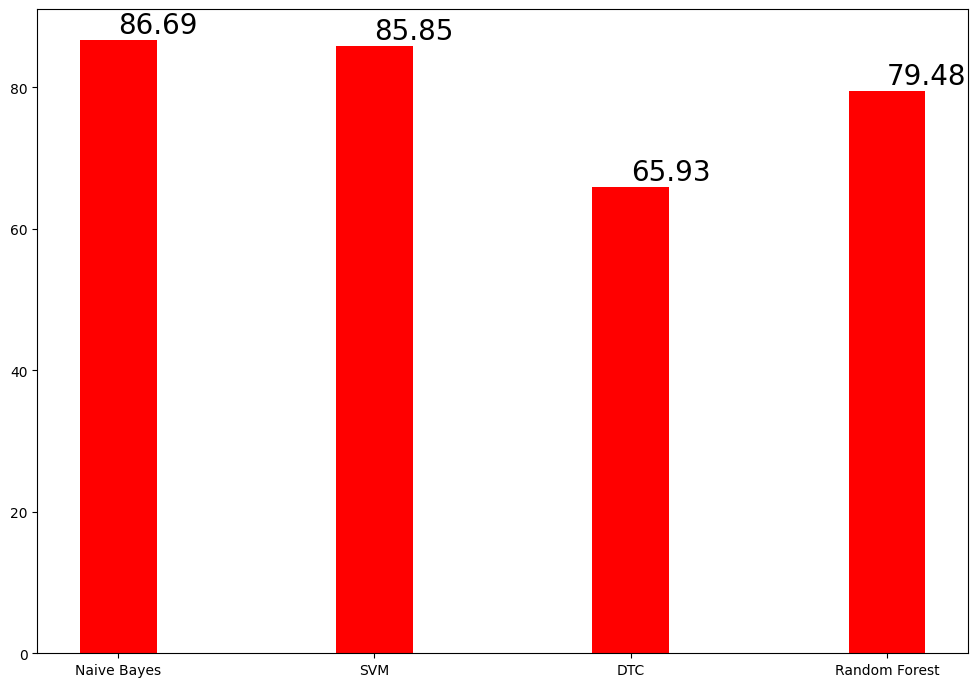

In [ ]:
import numpy as np

menMeans = np.array([NBacc,SVMacc,DTCacc,RFacc])*100
ind = ['Naive Bayes', 'SVM', 'DTC','Random Forest']
fig, ax = plt.subplots(figsize = (10,7))
ax.bar(ind,menMeans,width=0.3,color ='red')
for index,data in enumerate(menMeans):
    plt.text(x=index , y =data+1 , s="{:.2f}".format(data) , fontdict=dict(fontsize=20))
plt.tight_layout()
plt.show()

Лучшим методом является Native Bayes, худшим Decision Tree Classifier